In [2]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

In [3]:
import sys
sys.path += ['C:\\Users\\love-\\Documents\\Homeworks\\80-629\\week3-Supervised']


In [4]:
from utils import generate_data, plot_predictions, plot_svc_decision_function

# Question 2 - Classification

## Question 2.1

In [85]:
data = np.load("a22_devoir_q2-classification.npz") 
X = data["X"]
y = data["y"]

In [86]:
print(y)

[0 2 0 2 2 0 0 2 1 0 2 1 1 2 2 0 2 1 2 1 1 0 1 1 1 0 1 0 1 1 0 0 1 2 2 2 2
 0 2 2 0 2 2 2 1 0 1 0 1 2 0 1 0 0 0 2 1 2 2 2 1 1 1 1 0 0 0 2 1 0 0 1 0 2
 0 0 0 1 0 1 1 2 2 0 2 2 0 2 0 2 0 1 1 2 0 1 2 1 1 1]


In [87]:
print(X)
print(X[0])

[[ 0.15494743  0.37816252]
 [ 4.6781908   3.88829842]
 [ 0.06651722  0.3024719 ]
 [ 4.44780833  5.02608254]
 [ 4.77223375  5.00873958]
 [ 1.53277921  1.46935877]
 [ 0.17742614 -0.40178094]
 [ 4.68207696  5.33821665]
 [ 3.26816936  1.23011275]
 [-1.70627019  1.9507754 ]
 [ 5.5940149   5.15847131]
 [ 0.13905245  1.57791809]
 [ 2.50844214  2.11119275]
 [ 4.95077374  4.66826086]
 [ 6.08161797  5.66826397]
 [ 0.14404357  1.45427351]
 [ 4.9658792   5.85667136]
 [ 2.42111906  2.88331001]
 [ 5.28829541  4.89585062]
 [ 0.45814821  1.27554819]
 [ 0.34512589  2.30887379]
 [-0.51080514 -1.18063218]
 [ 1.81241247  2.96495855]
 [ 2.10351246  0.47278486]
 [ 2.0345496   2.55985975]
 [ 0.8644362  -0.74216502]
 [ 0.89523458  3.33366761]
 [ 1.86755799 -0.97727788]
 [-0.24772476  2.85123973]
 [ 4.32472605 -0.52163859]
 [ 1.23029068  1.20237985]
 [ 2.26975462 -1.45436567]
 [-0.25968511  4.41543178]
 [ 5.31261573  4.19897117]
 [ 5.38589528  5.41175208]
 [ 4.49989233  4.22761445]
 [ 4.35357155  5.13352543]
 

In [88]:
X.shape

(100, 2)

In [89]:
X.mean()

2.2693209543318646

In [90]:
x1, x2 = zip(*X)


(array([ 4.,  8., 17.,  7., 11.,  6.,  8.,  9., 18., 12.]),
 array([-1.98079647, -1.18624022, -0.39168397,  0.40287228,  1.19742853,
         1.99198478,  2.78654103,  3.58109728,  4.37565353,  5.17020978,
         5.96476603]),
 <BarContainer object of 10 artists>)

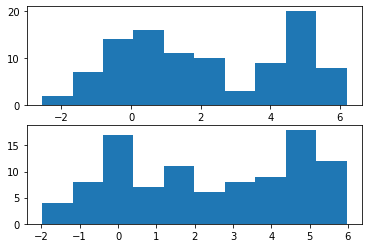

In [91]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(x1)
ax2.hist(x2)

(array([[ 2.,  7., 14., 16., 11., 10.,  3.,  9., 20.,  8.],
        [ 2.,  6., 13., 15., 10.,  6.,  9., 11., 17., 11.]]),
 array([-2.55298982, -1.6785336 , -0.80407738,  0.07037885,  0.94483507,
         1.81929129,  2.69374751,  3.56820373,  4.44265995,  5.31711617,
         6.19157239]),
 <a list of 2 BarContainer objects>)

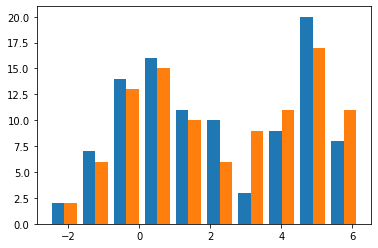

In [92]:
plt.hist(X)

c:\Users\love-\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


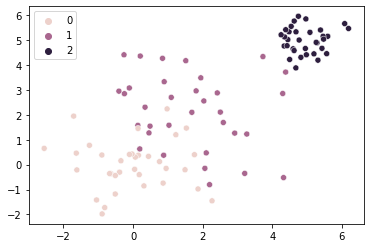

In [93]:
sns.scatterplot(x1, x2, hue = y)
plt.show()

In [94]:
#(4pt) Suite `a une exploration des donn´ees, que remarquez-vous? 
## Il y a deux grands groupes que l'on peut appercevoir. 
# Que pouvez-vous dire de la performance (taux de bonne classification) de test 
# d’un mod`ele n’utilisant que des fronti`eres de d´ecision lin´eaire pour ce probl`eme?

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
def OLS(X, y):
    # Note: on transforme simplement les cibles de {0,1} à {-1,+1}
    Y = (X_train[1]*2)-1
    Y = Y.reshape(2,1)

    # On calcule les paramètres du modèle
    # (c'est le même calcul que celui de la semaine dernière pour w_ols)
    A = np.linalg.inv(np.dot(X.T, X))
    B = np.dot(X.T, Y)
    
    return np.dot(A, B)

# pour obtenir la frontière de décision visuellement
def calculate_decision_boundary(W):
    x_1 = np.linspace(-10,10) # <- pour x1;
    
    # Le but est donc de calculer x2 à partir de x1 et des poids.
    x_2 = (-W[0] - W[1]*x_1) / W[2]
    return x_1, x_2

In [97]:
X = X_train

# On ajoute une colonne de 1 aux données
# Ça nous permet d'apprendre le biais (w0 dans: w_1x + w0)
X_b = np.array([np.ones(len(X)), X[:,0], X[:,1]]).T
####

Y = y_train 
X_test = X_test

# Comme plus haut on ajoute une colonne de 1 aux données de test
X_test_b = np.array([np.ones(len(X_test)), X_test[:,0], X_test[:,1]]).T
###

Y_test = y_test

# 1) On (estime) entraîne les paramètres
# k est le nombre de classes et dim est la dimensionalité des données 
W = OLS(X_b, Y) # dim x k

# 2) Une fois les paramètres obtenus, on peut obtenir les prédictions 
# a) for test data
y_x = np.dot(W.T, X_test_b.T) # valeur réelle
pred_test = 1*(y_x>0)[0] # valeur binaire

# b) Idem pour l'ensemble d'entraînement
y_x = np.dot(W.T, X_b.T)
pred_train = 1*(y_x>0)[0]


# 3) On calcule aussi la frontière de décision 
#    pour pouvoir la visualiser
line_x, line_y = calculate_decision_boundary(W)


# 4) Rendu visuel
plot_predictions(X,Y, X_test, Y_test, pred_train, pred_test, line_x, line_y)

ValueError: shapes (3,67) and (2,1) not aligned: 67 (dim 1) != 2 (dim 0)

## Question 2.2

In [ ]:
#(6pt) Divide your dataset into training, validation, and test sets. 
#The validation and test sets must each make up 20% of the total original dataset (so 40% in total). 
# Make sure to use this parameter upon calling the appropriate sklearn function: random state=1234. 
# Train a linear SVM on the training set for each one of these C hyperparameter values: {0.001,0.01,0.1,1,10}. 
# For each value of C, what is the performance (accuracy) of the model on the training and validation sets?
#  Given your answer, obtain the performance of the best model on the test set.
#  We ask that you provide the few lines of code you used to divide the data, train the model, and obtain the accuracy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234) # 0.25 x 0.8 = 0.2

In [ ]:
cs = [0.001, 0.01, 0.1, 1, 10]
for i, c in enumerate(cs):
    model= SVC(kernel='linear', C=c)
    model.fit(X_train, y_train)

    acc_train = (sum(model.predict(X_train)==y_train)/len(y_train))*100
    acc_validation =  (sum(model.predict(X_val)==y_val)/len(y_val)) *100 

    print("With a value of C: ", c, ", the accuracy of the train model is", acc_train, "% anf<d the accuracy of the  validation model is", acc_validation, "%")

    


With a value of C:  0.001 , the accuracy of the train model is 41.66666666666667 % ans the accuracy of the  validation model is 30.0 %
With a value of C:  0.01 , the accuracy of the train model is 83.33333333333334 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  0.1 , the accuracy of the train model is 86.66666666666667 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  1 , the accuracy of the train model is 90.0 % ans the accuracy of the  validation model is 90.0 %
With a value of C:  10 , the accuracy of the train model is 90.0 % ans the accuracy of the  validation model is 95.0 %


In [ ]:
model = SVC(kernel = 'linear', C = 10)
model.fit(X_train, y_train)

acc_test =  (sum(model.predict(X_test)==y_test)/len(y_test)) *100

print("With a value of C: ", c, ", the accuracy of the test model is", acc_test, "%")

With a value of C:  10 , the accuracy of the test model is 85.0 %


## Question 2.3

In [ ]:
#(4pt) Retrain the SVM model using 10-fold cross-validation for each of the C hyperparameter values from above. 
# For each value of C, provide the training and validation accuracies as well as the performance on the test set of the best model.
#  Careful that you must use the same test set in both cases (previous question and this question)!
#  We ask that you provide the few lines of codes you used to divide the data, train the model, and obtain all accuracies.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
#We keep validation and train together unlike the question above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
for c in cs:
    model = SVC(kernel='linear', C=c, random_state=1234)
    test = model.fit(X_train, y_train)

    scores = cross_validate(test, X_train,  y_train, cv=10,  return_train_score=True)

    #acc_train = (sum(model.predict(X_train)==y_train)/len(y_train))*100
    #acc_validation =  (sum(model.predict(X_val)==y_val)/len(y_val)) *100 

    print("With a value of C: ", c, ", the mean accuracy of the train model is", scores['train_score'].mean(), '% and the mean accuracy of the validation model is', scores['test_score'].mean(), '%')

With a value of C:  0.001 , the mean accuracy of the train model is 0.3875 % and the mean accuracy of the validation model is 0.3875 %
With a value of C:  0.01 , the mean accuracy of the train model is 0.861111111111111 % and the mean accuracy of the validation model is 0.85 %
With a value of C:  0.1 , the mean accuracy of the train model is 0.8777777777777779 % and the mean accuracy of the validation model is 0.8625 %
With a value of C:  1 , the mean accuracy of the train model is 0.9027777777777777 % and the mean accuracy of the validation model is 0.8625 %
With a value of C:  10 , the mean accuracy of the train model is 0.9152777777777776 % and the mean accuracy of the validation model is 0.875 %


In [ ]:
model = SVC(kernel = 'linear', C = 10)

acc_test =  (sum(test.predict(X_test)==y_test)/len(y_test)) *100

print("With a value of C: ", c, ", the accuracy of the test model is", acc_test, "%")

With a value of C:  10 , the accuracy of the test model is 95.0 %


## Question 2.4 - (2pt) Explain precisely how is the validation performance evaluated when doing cross validation.


## Question 2.5 - (2pt) Do you obtain a better model with cross validation or without it? Justify your answer and explain your result.

# 

# Question 3 - Regression

## Question 3.1

In [36]:
q3 = pd.read_csv("C:/Users/love-/Documents/HEC/AUT 2022/ML/reviews.tsv", sep ='\t', header = None, names=['Rating', 'Review'])
q3

,Rating,Review
0,5,I like the item pricing. My granddaughter want...
1,4,Love the magnet easel... great for moving to d...
2,5,Both sides are magnetic. A real plus when you...
3,5,Bought one a few years ago for my daughter and...
4,4,I have a stainless steel refrigerator therefor...
...,...,...
9995,1,There are multiple shapes part like oval and t...
9996,5,My 2 1/2 year old loves playing with these puz...
9997,5,I only wish I bought this toy sooner! It was ...
9998,5,My not quite 2 year old grandson took to this ...


In [37]:
q3.isna().sum()

Rating    0
Review    7
dtype: int64

In [43]:
check = q3[q3['Review'].isna()]
check

,Rating,Review
2339,5,NaN
2702,5,NaN
4653,5,NaN
8751,5,NaN
8770,2,NaN
9258,4,NaN
9690,5,NaN


In [44]:
q3 = q3.dropna()

In [47]:
q3.isna().sum()

Rating    0
Review    0
dtype: int64

In [48]:
y = q3['Rating']
X = q3['Review']

In [49]:
X[0]

'I like the item pricing. My granddaughter wanted to mark on it but I wanted it just for the letters.'

## Question 3.2

. (3pt) On vous demande ensuite d’obtenir une repr´esentation sac à mots (bag-of-words) des caract´eristiques (features). sklearn offre des fonctions pour y arriver. Pour limiter le temps d’entraˆınement requis, on vous demande d’utiliser un maximumde2000motsdansvotre vocabulaire (max features=2000) et d’utiliser la liste des mots vides de sklearn (stop words="english"). Cette liste permet de retirer des mots qui à priori ne seront pas utiles a la pr´ediction. Utilisez les autres param`etres par d´efaut de la fonction. Nous vous demandons les quelques lignes de code de sklearn que vous avez utilis´ees pour encoder (et seulement encoder) les donn´ees d’entraˆınement, de validation et de test.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1234) # 0.25 x 0.8 = 0.2

In [51]:
import bs4 as BeautifulSoup

In [52]:
import re

In [53]:
import nltk
 # Download text data sets, including stop words

In [54]:
from nltk.corpus import stopwords # Import the stop word list
print(stopwords.words("english") )

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup.BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))  

In [57]:
# Get the number of reviews based on the dataframe column size
num_reviews = X.size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    try:
        clean_train_reviews.append( review_to_words( X[i] ) )
    except KeyError:
        pass



c:\Users\love-\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [58]:
clean_train_reviews

['like item pricing granddaughter wanted mark wanted letters',
 'love magnet easel great moving different areas wish sort non skid pad bottom though',
 'sides magnetic real plus entertaining one child four year old find letters words two year old find pictures words spell bought letters magnetic pictures go board grandkids liked lot means like lot well even introduced markers used strictly magnetic board',
 'bought one years ago daughter loves still using today holidays bought one niece loved',
 'stainless steel refrigerator therefore much space son play magnet brought put magnet enjoys sticking magnet great play alphabet magnets',
 'nice magnetic board kids carry around play letter bought additional magnetic pieces mellissa doug increase thier play time hope works',
 'expected sturdy stands well sure long last grandsons love plalying',
 'granddaughter really really likes love fold put away would definately recommend',
 'good product unlimited possibilities also ordered magnetic letter

In [66]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

  
vectorizer = CountVectorizer(analyzer = "word",   \
                             stop_words = "english",  \
                             max_features = 2000) 


train_data_features = vectorizer.fit_transform(clean_train_reviews)

train_data_features = train_data_features.toarray()

Creating the bag of words...



In [67]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
print(train_data_features.shape)
#This has 9993 rows and 2000 features

(9986, 2000)


In [69]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['abby', 'abc', 'abilities', 'ability', 'able', 'absolutely', 'abuse', 'accessories', 'acquire', 'act', 'action', 'actions', 'active', 'activities', 'activity', 'actual', 'actually', 'add', 'added', 'addictive', 'adding', 'addition', 'additional', 'adds', 'admit', 'adorable', 'adult', 'adults', 'advanced', 'advantage', 'adventure', 'adventures', 'advertised', 'affect', 'age', 'aged', 'ages', 'ago', 'agree', 'ahead', 'air', 'alike', 'allow', 'allowed', 'allowing', 'allows', 'alot', 'alphabet', 'alternative', 'amazed', 'amazing', 'amazon', 'america', 'american', 'amusing', 'ancient', 'animal', 'animals', 'annoying', 'answer', 'answers', 'anymore', 'apart', 'apparently', 'appeal', 'appealing', 'appear', 'appears', 'appreciate', 'appropriate', 'area', 'areas', 'arkham', 'arrived', 'art', 'artwork', 'aside', 'ask', 'asked', 'asking', 'asks', 'aspect', 'aspects', 'assemble', 'assembled', 'assembly', 'attach', 'attached', 'attack', 'attacking', 'attempt', 'attention', 'attractive', 'available

c:\Users\love-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

34 abby
44 abc
87 abilities
167 ability
601 able
247 absolutely
51 abuse
41 accessories
37 acquire
33 act
170 action
99 actions
36 active
71 activities
81 activity
126 actual
538 actually
361 add
148 added
37 addictive
81 adding
307 addition
121 additional
165 adds
56 admit
77 adorable
255 adult
423 adults
114 advanced
50 advantage
82 adventure
38 adventures
32 advertised
42 affect
587 age
32 aged
427 ages
283 ago
86 agree
77 ahead
173 air
45 alike
144 allow
43 allowed
34 allowing
155 allows
64 alot
118 alphabet
49 alternative
37 amazed
140 amazing
365 amazon
35 america
33 american
37 amusing
37 ancient
84 animal
164 animals
152 annoying
175 answer
106 answers
56 anymore
238 apart
32 apparently
59 appeal
39 appealing
34 appear
62 appears
51 appreciate
99 appropriate
117 area
34 areas
77 arkham
113 arrived
167 art
84 artwork
58 aside
140 ask
125 asked
62 asking
45 asks
92 aspect
37 aspects
76 assemble
45 assembled
68 assembly
49 attach
84 attached
128 attack
39 attacking
59 attempt
227 